[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson4/hometask/Cluster.ipynb)

# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [20]:
# Colab Version
!wget https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson4/hometask/test_cluster.csv

--2022-08-04 14:11:16--  https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson4/hometask/test_cluster.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6431598 (6.1M) [text/plain]
Saving to: ‘test_cluster.csv.4’

test_cluster.csv.4  100%[===================>]   6.13M  --.-KB/s    in 0.04s   

2022-08-04 14:11:16 (174 MB/s) - ‘test_cluster.csv.4’ saved [6431598/6431598]



In [21]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

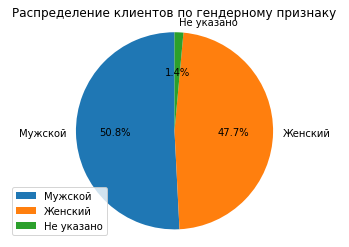

In [23]:
# Распределение по гендерному признаку. По данным графика примерно равное, мужчин на 3% больше.
labels = ['Мужской','Женский','Не указано']
sizes = [(len(df[df['gender']=='М']))/len(df)*100, (len(df[df['gender']=='F']))/len(df)*100, len(df[~((df['gender']=='М')|(df['gender']=='F'))])/len(df)*100]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax.axis('equal')
ax.legend(labels, loc='lower left')
plt.title('Распределение клиентов по гендерному признаку')
plt.show()

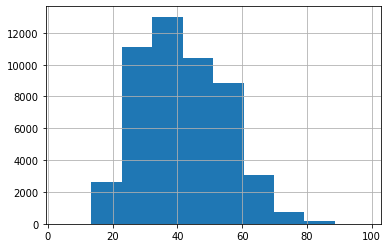

In [24]:
#По данным графика бОльшая часть клиентов сосредоточена в возрастной группе от 20 до 40 лет (что логично, так как в лидерах наиболее экономически активная часть населения).
#Наблюдается резкий скачок от 17-18 лет в период роста у клиента потребностей в банковских услугах. С 60 лет резкий спад - предположительно связан с рисками кредитования пожилых клиентов.
age_of_clients = df['age'].hist()
fig = age_of_clients.get_figure()

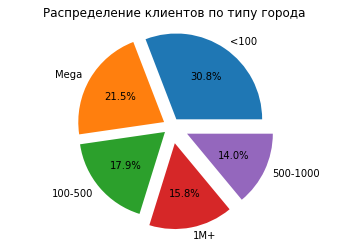

In [25]:
#Представлено распределение по типу городов, в которых проживают клиенты. 30,8% клиентов из небольших городов <100. 21,5% из мегаполисов. По остальным клиентам в среднем равное распределение.
#Малые города отличаются невысоким уровнем жизни и отсутст-м работы, потребность в услугах Банка весьма высока, в мегаполисах надо идти в ногу со временем и стоимость услуг выше - отсюда высокий спрос.
labels = [x for x in df.city_type.unique()]
sizes = df.city_type.value_counts().reset_index()['city_type']
explode = [0.1, 0.1, 0.1, 0.2, 0.2]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Распределение клиентов по типу города')
plt.show()


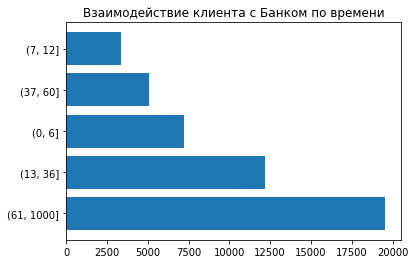

In [26]:
#Для более наглядного примера выделим основные группы по сроку взаимодействия клиента с Банком.
#Порядка 18,5 тыс.клиентов взаимодействуют с Банком от 5 лет, назовем их "приверженцами Банка", их всё устраивает и менять ничего не нужно.
#Однако обратим внимание, что кол-во клиентов с периодом от 0 до 6 мес. сильно больше, чем кол-во клиентов от 7 до 12, скорее всего прошла пиар-акция по привлечению клиентов.
#Есть негативный тренд, количество клиентов в период от 37 до 60 мес сильно меньше, что говорит об оттоке клиентов в данный период.
bins = pd.IntervalIndex.from_tuples([(0, 6), (7, 12), (13, 36),(37,60),(61,1000)])
df['mob_groups'] = pd.cut(df['full_mob'], bins)
df['mob_groups'].value_counts()
sizes = df['mob_groups'].value_counts().reset_index(drop = True)
fig, ax = plt.subplots()
ax.barh(width = sizes, y = sizes.index, tick_label = df['mob_groups'].value_counts().index)
plt.title('Взаимодействие клиента с Банком по времени')
plt.show()

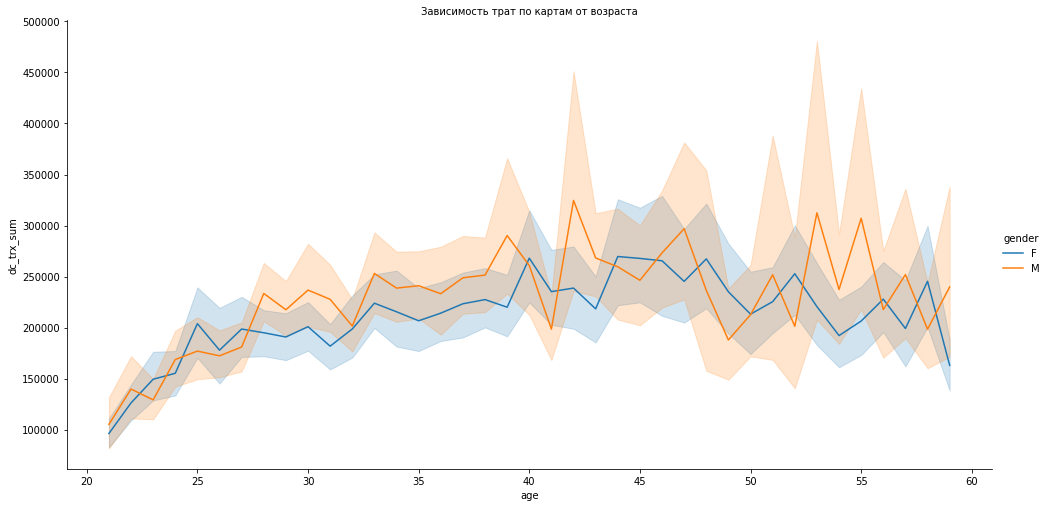

In [27]:
#Выведена зависимость трат по картам от возраста, пиковые значения от 40 до 55 лет.
sns.relplot(x='age',
            y='dc_trx_sum',
            hue='gender',
            hue_order=["F", "М"],
            data=df.query("age > 20 and age < 60"),
            aspect=2,
            height=7,
            kind='line')
plt.title('Зависимость трат по картам от возраста', size=10);

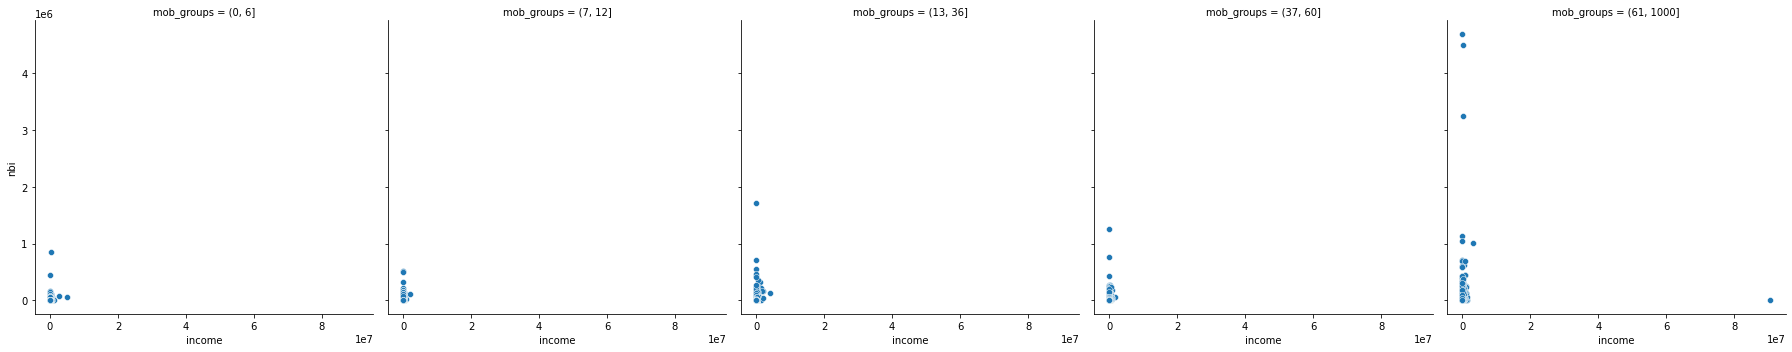

In [28]:
#Выведем зависимость дохода клиента и дохода Банка, с учетом срока обслуживания в Банке.
#В среднем, чем больше доход клиента, тем больше получает Банк, есть несколько выбросов на графиках.
sns.relplot(x='income', y='nbi', col = 'mob_groups', data=df)

Text(0.5, 1.0, 'Тепловая карта зависимости')

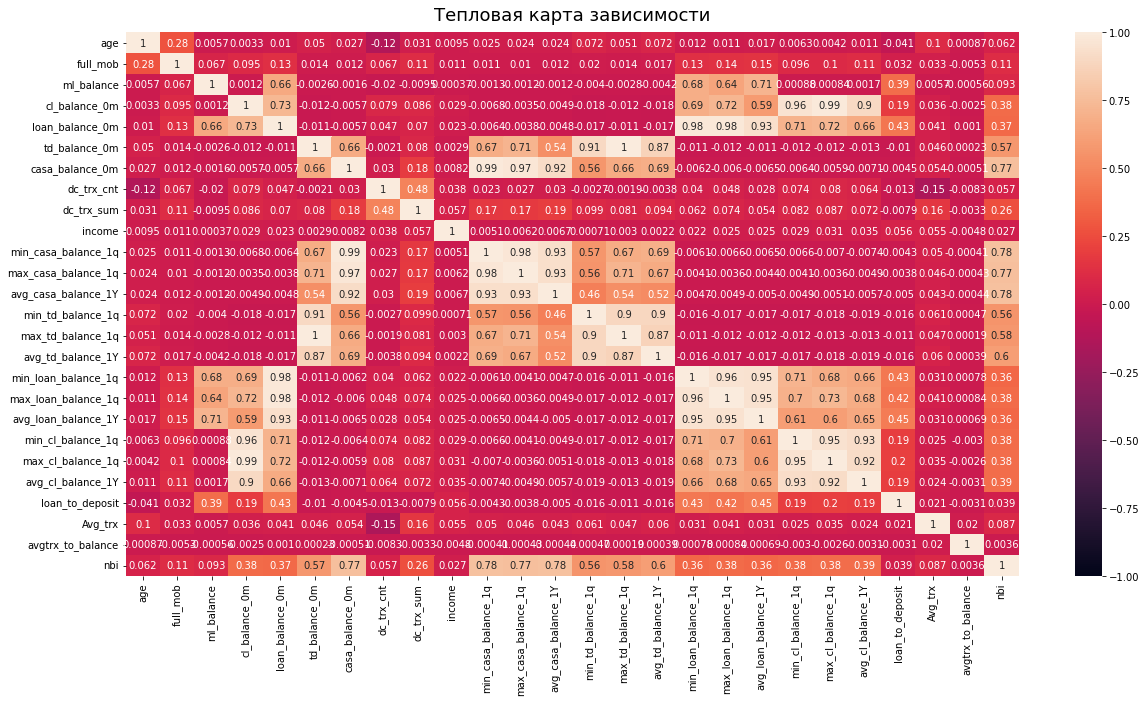

In [33]:
#Представлены зависимости всех показателей друг от друга в анализируемых данных. Чем сильнее зависимость, тем ярче ячейка - к примеру, видна зависимость прибыли Банка от уровня потреб.кредитов и баланса депозитов.
# Отсюда можно сделать вывод, что наиболее доходными являются потреб.кредиты.
df1 = df.corr()
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df1, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Тепловая карта зависимости', fontdict={'fontsize':18}, pad=12)